# Technical Report


### Class: CPSC 322, Spring 2021


### Submitted By: Hailey Mueller and Chloe Crawford

## Introduction

The dataset used for this classification was constructed by getting experts to rank the quality of a certain wine, then determining the set of scientifically measurable attributes for that bottle of wine. What we tried to do was see if there was a way to predict the quality of the wine based on these scientific attributes. The classifier that worked best for us was the Naive Bayes classifier, with an accuracy of 60%. 

## Data Analysis


### Information about the Dataset


<u>Attributes:</u>
- Fixed acidity (int)
- Volatile acidity (int)
- Citric acid (int)
- Residual sugar (int)
- Chlorides (int)
- Free sulfur dioxide (int)
- Total sulfur dioxide (int)
- Density (int)
- pH (int)
- Sulphates (int)
- Alcohol (int)
- Quality* (int)


"*" = Denotes the attribute being used as the label


<u># of Instances:</u> 1600

### Summary Statistics

In [4]:
## Summary Statistics

from mysklearn.mypytable import MyPyTable
import os

# Compute summary statistics
table = MyPyTable().load_from_file(os.path.join("input_files","winequality-red.csv"))
print("---------------------------------------------------------------------------")
print("Summary Statistics:")
print("---------------------------------------------------------------------------")
newTable = table.compute_summary_statistics(table.column_names)

---------------------------------------------------------------------------
Summary Statistics:
---------------------------------------------------------------------------
attr                      min        max        mid     avg       med
--------------------  -------  ---------  ---------  ------  --------
fixed acidity         4.6       15.9       10.25      8.32    7.9
volatile acidity      0.12       1.58       0.85      0.528   0.52
citric acid           0          1          0.5       0.271   0.26
residual sugar        0.9       15.5        8.2       2.539   2.2
chlorides             0.012      0.611      0.3115    0.087   0.079
free sulfur dioxide   1         72         36.5      15.875  14
total sulfur dioxide  6        289        147.5      46.468  38
density               0.99007    1.00369    0.99688   0.997   0.99675
pH                    2.74       4.01       3.375     3.311   3.31
sulphates             0.33       2          1.165     0.658   0.62
alcohol               

#### Important Takeaways from Summary Statistics


The difference between the min and max of the density attribute is only 0.01362, so this attribute might not be super important to the quality of the wine.


Many of the median values are closer to the minimum value than to the maximum value.

### Data Visualizations

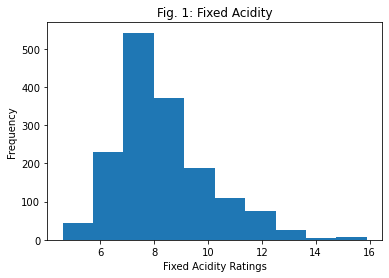

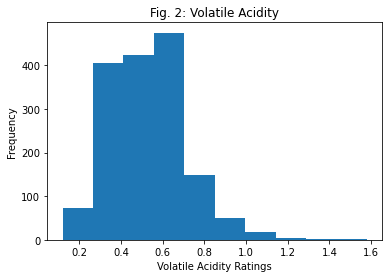

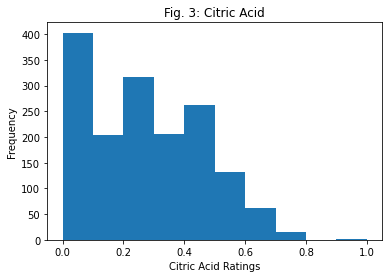

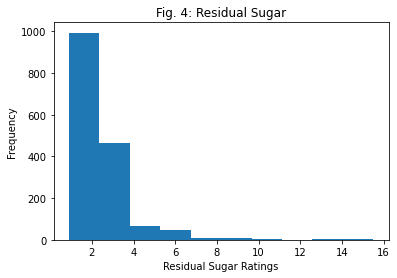

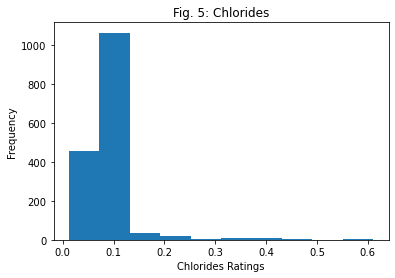

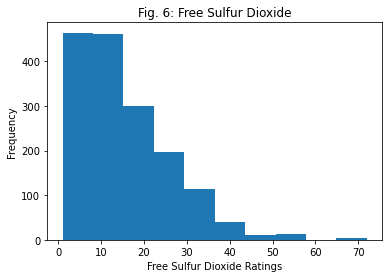

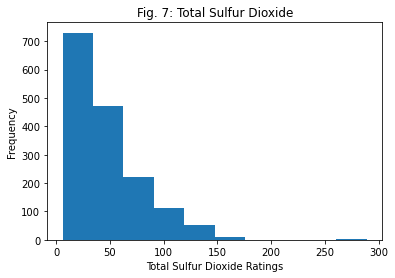

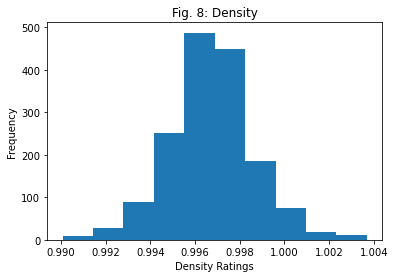

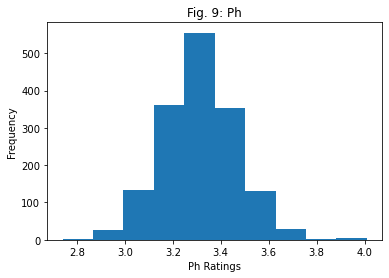

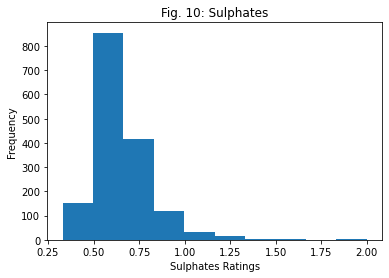

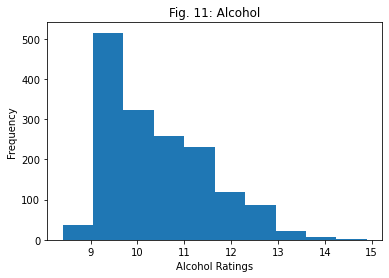

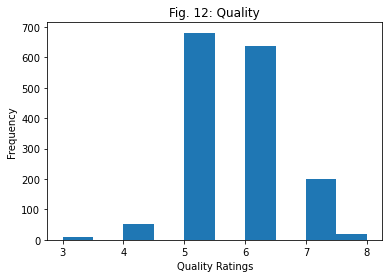

In [10]:
## Data Visualization Code

from mysklearn.mypytable import MyPyTable
import os
import mysklearn.plot_utils as plot
import importlib
importlib.reload(plot)

# Create histogram of each column in csv file
table = MyPyTable().load_from_file(os.path.join("input_files","winequality-red.csv"))

i = 1
for name in table.column_names:
    plot.createHistogram(name.title(),table.get_column(name, False), i)
    i += 1

### Histogram Inspection


- <u>Fixed acidity:</u> Skew right
- <u>Volatile acidity:</u> Skew right
- <u>Citric acid:</u> Skew right
- <u>Residual sugar:</u> Skew right
- <u>Chlorides:</u> Skew right
- <u>Free sulfur dioxide:</u> Skew right
- <u>Total sulfur dioxide:</u> Skew right
- <u>Density:</u> Symmetric, unimodal
- <u>pH:</u> Symmetric, unimodal
- <u>Sulphates:</u> Skew right
- <u>Alcohol:</u> Skew right
- <u>Quality*:</u>



I decided to create a histogram of each column in winequality-red.csv because I wanted to see which variables were most important in determining the quality of the wine. Graphs that show variables with a small distribution (ie. all the values are around the same place), then those variables might not be super useful in our classification. These graphs can also help us narrow down which variables we will want to use in our classification.

Quality, our class attribute, has many more 5s and 6s than any other number (Fig. 12). Because the quality is always going to be a whole number, it doesn't leave much room for variation in the classifiers. It's going to be difficult to get an accurate predictor because the class attribute is so concentrated.

## Classification Results

### Decision Tree

We used the decision tree classifier that we developed in class for Programming Assignment 6. In order to test predictive ability, we witheld some of our table as a test set, ran it through the predict method, and then compared the predicted "y" values against the test set of "y" values. By obtaining the number of correct and incorrect answers, we were then able to calculate the accuracy and error rate. For the decision tree, the accuracy was 57.9% while the error rate was 42.1% - showing that this tree is accurate just over half of the time.

### Random Forest

For the random forest, we essentially made a list of decision trees. Before we passed the data into the decision tree classifier fit function, we split it into train and test sets. Once in the decision tree function, the tree generated much the same way until we got to the select_attribute() function. Just prior to this function, we computed a random subset of the data to generate the tree off of. Our N value, or the number of trees that we generated, was 100. From those 100 initial trees, we determined the M best trees - our M value is set to 30. We determined the best trees by calculating accuracy in much the same way that we did above for one decision tree. Then, once we had our best trees, we calculated the accuracy and error for the forest as a whole. The accuracy for the random forest is 37.5% and the error is 62.5%. Our random forest is not very accurate - we think that this is because there are so many 5s and 6s in our class values that it overrides any other determination in random trees.

### Naive Bayes

For our Naive Bayes classifier, we again used the one that we had developed in class - this time for Programming Assignment 5. The predictions for Naive Bayes showed that this classifier has a 60% accuracy and a 40% error rate, just bearly beating out the decision tree for our best classifier. 

## Conclusion

Conclusion: Provide a brief conclusion of your project, including a short summary of the dataset you used (and any of its inherent challenges for classification), the classification approach you developed, your classifiers performance, and any ideas you have on ways to improve its performance. 
In conclusion, our dataset was scientific aspects of bottles of wine and how the end quality was affected by them. This dataset was difficult to classify because so many of the instances were quality 5 or 6, which strongarmed the classifiers into ignoring the possibility of the wine being classified any other number. Our best classification approach was the Naive Bayes classifier which, at a 60% accuracy, was better than the Decision Tree classifier (57.9% accuracy), and the Random Forest classifier (37.5% accuracy). The best way to improve the performance in our opinion would be to get more data instances that had qualities of something other than 5 or 6. By adding more data to what are currently the outliers, the classifiers will get more accurate.